## Goal:

Here we test the functions: `lbfgsb` in the `Screenkhorn` class.

In [1]:
# NUMPY
import numpy as np
np.random.seed(3946)
# MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.context('dark_background')
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

# SKLEARN 
from sklearn.metrics import pairwise_distances

# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# TIME
from time import time 

# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/'
sys.path.insert(0, path_files) 


# POT
import ot
from ot import sinkhorn, emd

# GREENKHORN 
from ot.bregman import greenkhorn

# SCREENKHORN
from screenkhorn.base import Screenkhorn


## Data generation

In [2]:
n_1 = 10000# nb samples
n_2 = 10000
mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n_1, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n_2, mu_t, cov_t)

a = np.ones((n_1,)) / n_1
b = np.ones((n_2,)) / n_2  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()
reg = 0.09
K = np.exp(-M/reg)

In [3]:
# lower bound for eta
lower_bound_eta = M.max()/806
lower_bound_eta

0.0012406947890818859

## Sinkhorn 

In [4]:
tic = time()
P_sink = sinkhorn(a, b, M, reg, log=True)
P_star = P_sink[0]
outputs_dict = P_sink[1]
exp_u_star = outputs_dict['u']
exp_v_star = outputs_dict['v']
time_sink = time() - tic
print("time of Sinkhorn algorithm is %s" %time_sink)

time of Sinkhorn algorithm is 2.6152713298797607


## LBFGS

In [5]:
u0 = np.full(n_1, 1.0) 
v0 = np.full(n_2, 1.0)
I_active = list(range(n_1))
J_active = list(range(n_2))

In [6]:
tic = time()
screenkhorn = Screenkhorn(a, b, M, reg, 0.0, I_active, J_active)
lbfgsb = screenkhorn.lbfgsb(u0, v0)
toc_bfgs = time() - tic
toc_bfgs

/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/base.py:53: RuntimeWarning: divide by zero encountered in log
  - np.log(self.epsilon) * (self.a_Ic.sum() + self.b_Jc.sum())
/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/base.py:53: RuntimeWarning: invalid value encountered in double_scalars
  - np.log(self.epsilon) * (self.a_Ic.sum() + self.b_Jc.sum())
/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/base.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  + len(self.J) * (self.b_J.max() / (self.epsilon * self.n * self.K.min()))),\
/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/base.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  self.a_I.max() / (self.epsilon * self.m * self.K.min()))] * len(self.I)
/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/base.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  + len(self.I) * (self.a_I.max() / (self.epsilon * self.m

Time spending during the restricted Skinkhorn is 0.5559906959533691


2.331798791885376

In [7]:
print("Time of Sinkhorn: %s" %time_sink, '\n')
print("Time of LBFGS inculding the class initialization: %s" %toc_bfgs, '\n')
print("Ratio Time of Sinkhorn / Time of LBFGS: %s" %(time_sink / toc_bfgs),'\n')
print("Ratio Time of LBFGS /Time of Sinkhorn : %s" %( toc_bfgs / time_sink))

Time of Sinkhorn: 2.6152713298797607 

Time of LBFGS inculding the class initialization: 2.331798791885376 

Ratio Time of Sinkhorn / Time of LBFGS: 1.1215681811744929 

Ratio Time of LBFGS /Time of Sinkhorn : 0.8916087463829546


In [8]:
tic = time()
lbfgsb = screenkhorn.lbfgsb(u0, v0)
toc_bfgs = time() - tic
toc_bfgs

Time spending during the restricted Skinkhorn is 0.5695021152496338


0.6824619770050049

In [9]:
print("Time of Sinkhorn: %s" %time_sink, '\n')
print("Time of LBFGS without class initialization: %s" %toc_bfgs, '\n')
print("Ratio Time of Sinkhorn / Time of LBFGS: %s" %(time_sink / toc_bfgs), '\n')
print("Ratio Time of LBFGS /Time of Sinkhorn : %s" %( toc_bfgs / time_sink))

Time of Sinkhorn: 2.6152713298797607 

Time of LBFGS without class initialization: 0.6824619770050049 

Ratio Time of Sinkhorn / Time of LBFGS: 3.8321128766131705 

Ratio Time of LBFGS /Time of Sinkhorn : 0.2609526473248883


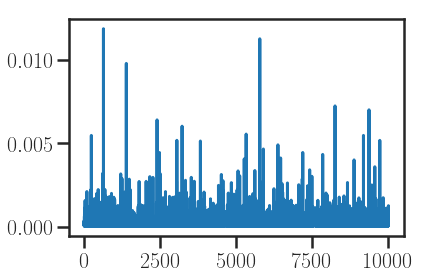

In [10]:
plt.plot(exp_u_star);

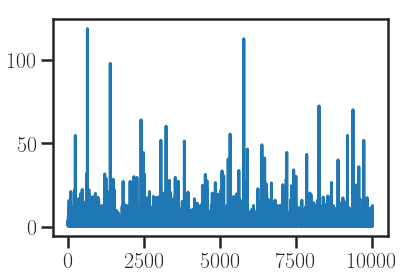

In [11]:
plt.plot(lbfgsb[0]);

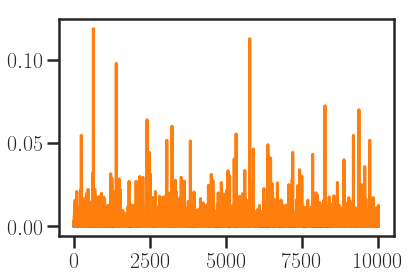

In [12]:
plt.plot(exp_u_star)
plt.plot(lbfgsb[0]/1e3);

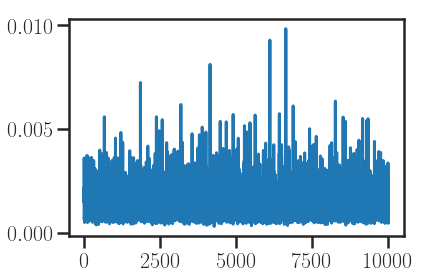

In [13]:
plt.plot(exp_v_star);

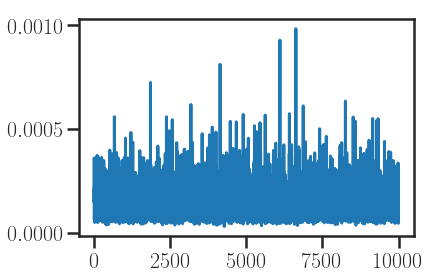

In [14]:
plt.plot(lbfgsb[1]*1e3);

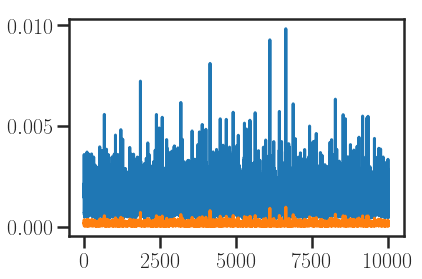

In [15]:
plt.plot(exp_v_star)
plt.plot(lbfgsb[1]*1e3);

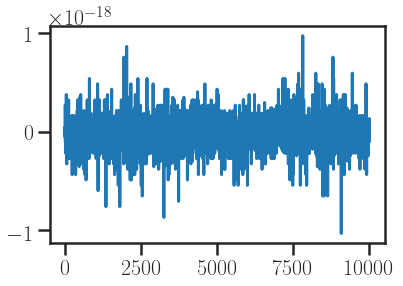

In [16]:
# Gradient w.r.t. u
plt.plot(lbfgsb[3]['grad'][:len(I_active)]);

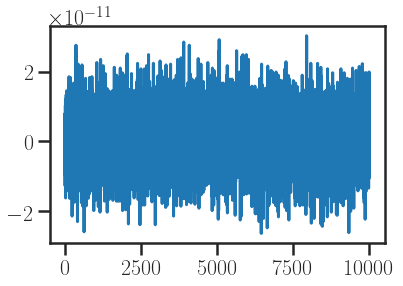

In [17]:
# Gradient w.r.t. v
plt.plot(lbfgsb[3]['grad'][len(I_active):]);

In [18]:
# sinkhorn
P_star = np.diag(exp_u_star) @ K @ np.diag(exp_v_star)
a_star = P_star @ np.ones(n_2)
b_star = P_star.T @ np.ones(n_1)

# screenkhorn via lbfgsb
usc_bfgs = lbfgsb[0]
vsc_bfgs = lbfgsb[1]
P_sc_bfgs = np.diag(usc_bfgs) @ K @ np.diag(vsc_bfgs)
a_sc_bfgs = P_sc_bfgs @ np.ones(n_2)
b_sc_bfgs = P_sc_bfgs.T @ np.ones(n_1)

print("sum of the marginals in sinkhorn are: %s, \t %s" %(sum(a_star), sum(b_star)))
print("\t")
print("sum of the marginals in screenkhorn are: %s, \t %s" %(sum(a_sc_bfgs), sum(b_sc_bfgs)))
print("\t")
print("Difference in sinkhorn: %s \t %s:" %(abs(1 - sum(a_star)), abs(1 - sum(b_star))))
print("\t")
print("Difference in screenkhorn: %s \t  %s:" %(abs(1 - sum(a_sc_bfgs)), abs(1 - sum(b_sc_bfgs))))
print("\t")
print("Frobenius norm of difference solution matrices %s " %np.linalg.norm(P_star - P_sc_bfgs,'fro'))
print('\t')
print("Max norm of difference solution matrices %s "  %abs(P_star - P_sc_bfgs).max())

sum of the marginals in sinkhorn are: 0.9999999999999062, 	 0.9999999999999061
	
sum of the marginals in screenkhorn are: 0.9999999999999062, 	 0.9999999999999059
	
Difference in sinkhorn: 9.381384558082573e-14 	 9.392486788328824e-14:
	
Difference in screenkhorn: 9.381384558082573e-14 	  9.414691248821327e-14:
	
Frobenius norm of difference solution matrices 1.019502218253873e-18 
	
Max norm of difference solution matrices 4.208694956669805e-21 
